# Milestone 2 Assignment - Capstone Check-in

## Author - Mike Pearson

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## Tasks
<img src="https://library.startlearninglabs.uw.edu/DATASCI420/img/Milestone2Sample.PNG" style="float: right; width: 400px;">
For this check-in, you are to:

1). Explicitly state the problem, list sources, and define the methodology: classification, regression, other

2). List data processing steps (psuedo code) including steps from data source collection & preparation, feature engineering & selection, modeling, performance evaluation.

3). Read in the previously generated data file of cleaned up data

4). Perform feature engineering and selection

5). Conduct some preliminary modeling 

6). Identify potential machine learning model(s) to improve performance


## Project Goal



### The goal of this project is to determine if adding stock market data will improve the predictability of house prices in King County. The thinking is that stock prices expand and contract the resources that buyers have and will have an effect on the prices that buyers are willing to pay for homes.

### I chose the 5 largest employers in King County with publicly traded stock, and I also included the Dow Jones Industrial average.

### Data sources:  the King County real estate data set from UW Course 410 in Data Science: url :"https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"

### Stock market data was downloaded from Yahoo finance for the same time period as the King County data.

### The choice of the 5 companies was based on this article in TripSavvy https://www.tripsavvy.com/biggest-seattle-area-employers-2965051


### That data was uploaded (in csv format) to my github deposity for this course

### The Dow Jones Industrial closing value for the period May 2, 2014 to May 27, 2015

URL2 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/DJI.csv'

### Amazon's closing price for the period May 2, 2014 to May 27, 2015
URL3 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/AMZN.csv'

### Boeing's closing price for the period May 2, 2014 to May 27, 2015
URL4 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/BA.csv'

### Microsoft's closing price for the period May 2, 2014 to May 27, 2015

URL5 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/MSFT.csv'


### Starbucks' closing price for the period May 2, 2014 to May 27, 2015

URL6 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/SBUX.csv'

### Walmart's closing price for the period May 2, 2014 to May 27, 2015

URL7 = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/WMT.csv'




## Data Processing Steps

## As pseudo code...

### Read in the Housing data set 
### Add a datetime column using the "date" column in the data
### Separately add columns for "day," "month," and "year" to help with sorting later on.

### Read in the stock data and Dow data files
### Add a datetime column using the "date" column in  the data
### Separately add columns for "day", "month," and "year."

### Add the stock market data to the housing data set sorting by "day", "month", and "year".


### Examine the data with describe command and some plotting

### Find the outliers and remove any outliers (mostly high counts of bedrooms and bathrooms)


### Normalizing and binning
### normalize the price, replace outliers with the mean
### Norm the square footage of living space
### Get rid of outliers in terms of number of bedrooms (more than 9)
### Get rid of outlier in terms of number of bathrooms (more than 4)
### Make the year a category (2014, yes or no)
### Get the age of the house

### Upload the normed and binned file to github

### note: I forgot to norm the stock market prices before uploading, I will do it in this iteration

## Feature Engineering and Selection

In [2]:
# Data file location


data_url = 'https://raw.githubusercontent.com/mutecypher/DataSci-420/master/All_data.csv'


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sbn
from dateutil.parser import parse

In [4]:
All_data = pd.read_csv(data_url)
print(All_data.head())

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  1999700045  20140502T000000   313000.0         3       1.50         1340   
1  1860600135  20140502T000000  2384000.0         5       2.50         3650   
2  5467900070  20140502T000000   342000.0         3       2.00         1930   
3  4040800810  20140502T000000   420000.0         3       2.25         2000   
4  7197300105  20140502T000000   550000.0         4       2.50         1940   

   sqft_lot  floors  waterfront  view ...       Boeing  Microsoft  Starbucks  \
0      7912     1.5           0     0 ...   129.940002  39.689999  35.299999   
1      9050     2.0           0     4 ...   129.940002  39.689999  35.299999   
2     11947     1.0           0     0 ...   129.940002  39.689999  35.299999   
3      8030     1.0           0     0 ...   129.940002  39.689999  35.299999   
4     10500     1.0           0     0 ...   129.940002  39.689999  35.299999   

     Walmart  Dow Jones Industrial  price_no

### I will normalize the stock market data now

In [5]:
## norm 0 to 1 Amazon pricing

AMZN_lo = np.min(All_data['Amazon'])
AMZN_hi = np.max(All_data['Amazon'])
AMZN_mean = np.mean(All_data['Amazon'])
All_data['Amazon_normed'] = (All_data['Amazon'] - AMZN_lo)/(AMZN_hi - AMZN_lo)

## norm 0 to 1 Boeing pricing
BA_lo = np.min(All_data['Boeing'])
BA_hi = np.max(All_data['Boeing'])
BA_mean = np.mean(All_data['Boeing'])
All_data['Boeing_normed'] = (All_data['Boeing'] - BA_lo)/(BA_hi - BA_lo)


## norm 0 to 1 Microsoft pricing
MS_lo = np.min(All_data['Microsoft'])
MS_hi = np.max(All_data['Microsoft'])
MS_mean = np.mean(All_data['Microsoft'])
All_data['Microsoft_normed'] = (All_data['Microsoft'] - MS_lo)/(MS_hi - MS_lo)

## norm 0 to 1 Starbucks pricing
SB_lo = np.min(All_data['Starbucks'])
SB_hi = np.max(All_data['Starbucks'])
SB_mean = np.mean(All_data['Starbucks'])
All_data['Starbucks_normed'] = (All_data['Starbucks'] - SB_lo)/(SB_hi - SB_lo)


## norm 0 to 1 Walmart pricing
WM_lo = np.min(All_data['Walmart'])
WM_hi = np.max(All_data['Walmart'])
WM_mean = np.mean(All_data['Walmart'])
All_data['Walmart_normed'] = (All_data['Walmart'] - WM_lo)/(WM_hi - WM_lo)


## norm 0 to 1 Dow Jones Industrial pricing
DJI_lo = np.min(All_data['Dow Jones Industrial'])
DJI_hi = np.max(All_data['Dow Jones Industrial'])
DJI_mean = np.mean(All_data['Dow Jones Industrial'])
All_data['DJI_normed'] = (All_data['Dow Jones Industrial'] - DJI_lo)/(DJI_hi - DJI_lo)




print(All_data.describe())
print(All_data.columns.values)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.099100e+04  2.099100e+04  20991.000000  20991.000000  20991.000000   
mean   4.577684e+09  5.398727e+05      3.371635      2.114228   2080.967129   
std    2.876506e+09  3.680529e+05      0.931321      0.769530    920.347958   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.000000      1.750000   1430.000000   
50%    3.904911e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.305600e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.099100e+04  20991.000000  20991.000000  20991.000000  20991.000000   
mean   1.518508e+04      1.493807      0.007479      0.234481      3.409175   
std    4.129677e+04      0.540023      0.086162    

## Let's get rid of un-normed data and non-needed columns

In [8]:
Keepers = All_data[['datetime','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view'
                    , 'condition', 'age','grade', 'sqft_above', 'sqft_basement',  '2015year', 'month'
                    ,'day', 'price_normed', 'Amazon_normed','Boeing_normed', 'Microsoft_normed'
                    , 'Starbucks_normed', 'Walmart_normed','DJI_normed']]
##print(Keepers.describe())
##print(Keepers.dtypes)

## now make datetime the index
Keepers['datetime'] = pd.to_datetime(Keepers['datetime'])
Keep_time = Keepers.drop(['datetime'], axis=1)
Keep_time.index = Keepers.datetime



/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Preliminary Data Model

### I'll do a simply linear regression with all the features

In [9]:
import sklearn.linear_model as lm
import sklearn as sk
X = Keep_time.drop(['price_normed'], axis = 1)
## used to have datetime dropped
Y = pd.DataFrame()
Y['price_normed'] = Keep_time['price_normed']


from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

lm_mod = lm.LinearRegression(fit_intercept = True)
mod_fit = lm_mod.fit(X_train, y_train)
y_test['scores'] = mod_fit.predict(X_test)
y_test['resids'] = y_test['scores'] - y_test['price_normed']
total_resids = np.sum(np.absolute(y_test['resids']))
print("\n The total of the residuals is")
print("\n", total_resids)
print("\n y_test head is")
print("\n", y_test.head())
print("\nThe shape of y_test is")
print("\n", y_test.shape)


 The total of the residuals is

 82.73540733181395

 y_test head is

             price_normed    scores    resids
datetime                                    
2015-03-19     -0.003055  0.008534  0.011589
2015-04-27     -0.027216 -0.048565 -0.021349
2014-10-01     -0.016742 -0.028213 -0.011471
2015-01-28     -0.053613 -0.066899 -0.013287
2014-06-30     -0.033501 -0.049869 -0.016367

The shape of y_test is

 (4199, 3)


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


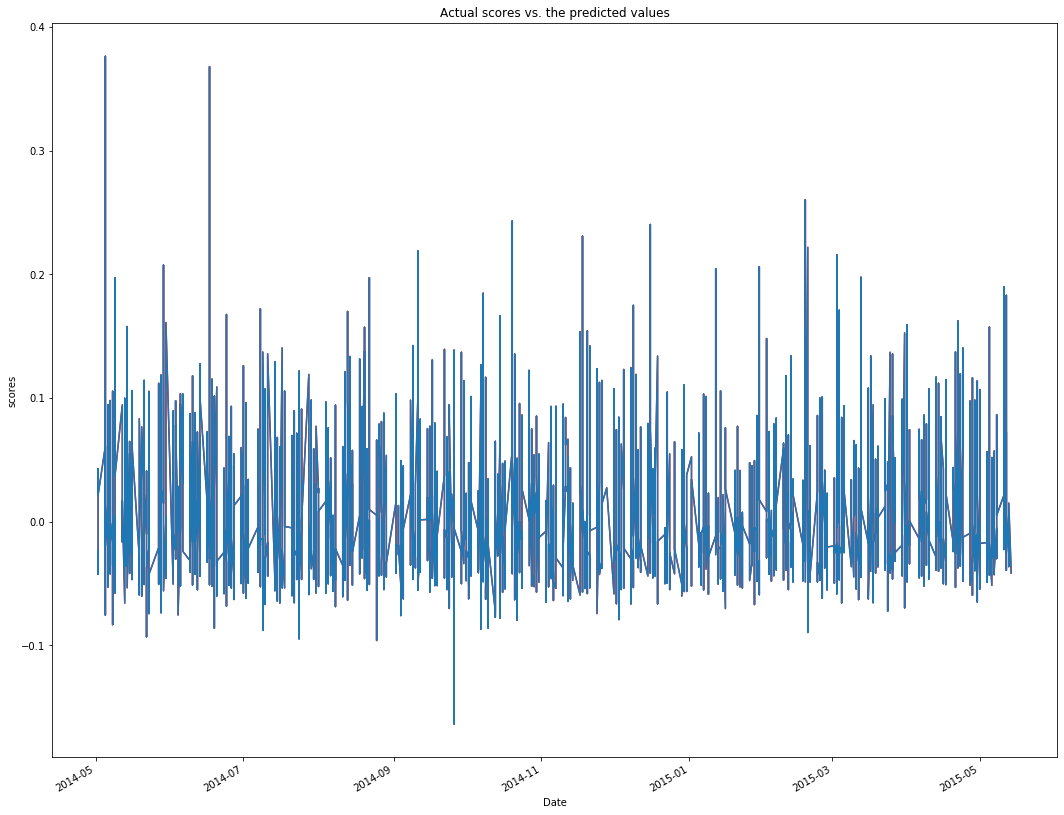

In [10]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(18, 15)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(y_test, 'scores')  



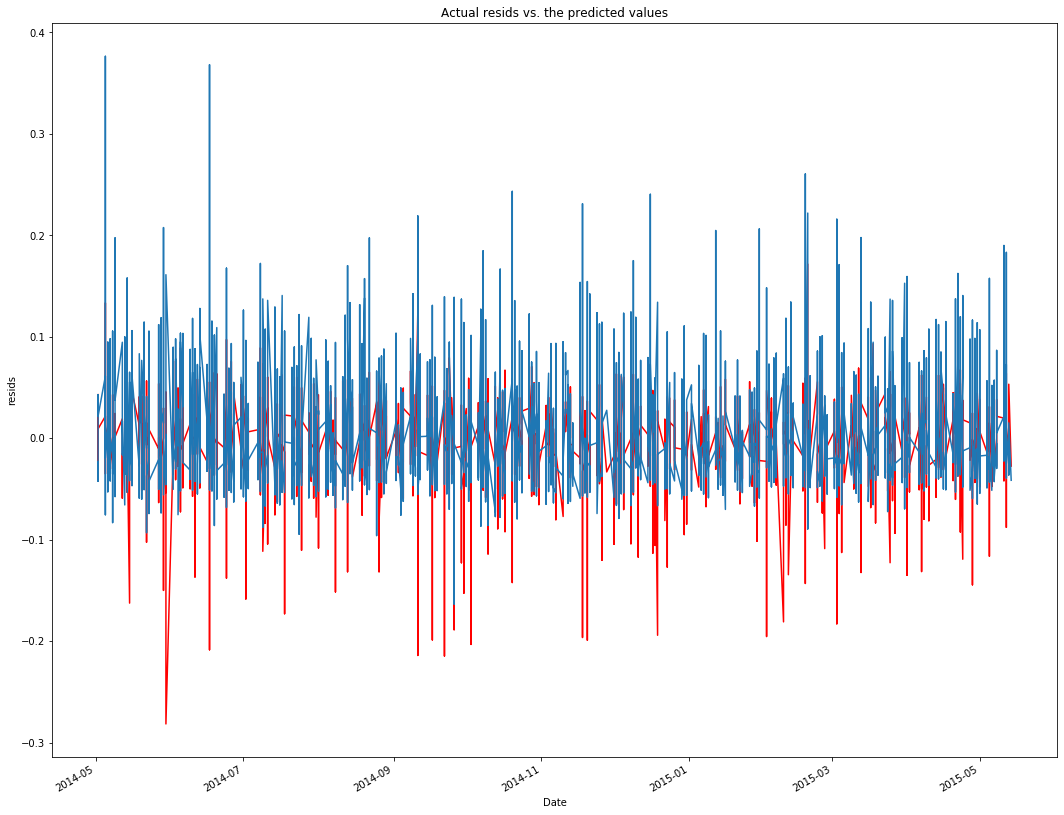

In [11]:
## plot of residuals

def resid_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(18, 13)) # set plot area
    ax = fig.gca() # define axis  
    ax.set_title('residual values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel('residuals')# Set text for y axis
plot_mod_fit(y_test, 'resids')  



## Now I'll try a multiple regression

In [16]:
X = Keep_time.drop(['price_normed'], axis = 1)
## used to have datetime dropped
Y = pd.DataFrame()
Y['price_normed'] = Keep_time['price_normed']
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

import statsmodels.api as sm

##X = sm.add_constant(X)
statmod = sm.OLS(y_train,X_train)
res = statmod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           price_normed   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1047.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:02:34   Log-Likelihood:                 32758.
No. Observations:               16792   AIC:                        -6.548e+04
Df Residuals:                   16772   BIC:                        -6.532e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms            -0.0112      0.000  

In [22]:
from statsmodels.multivariate.pca import PCA

pc = PCA(Keep_time, standardize = False)
print(pc.factors.shape)

(20991, 22)


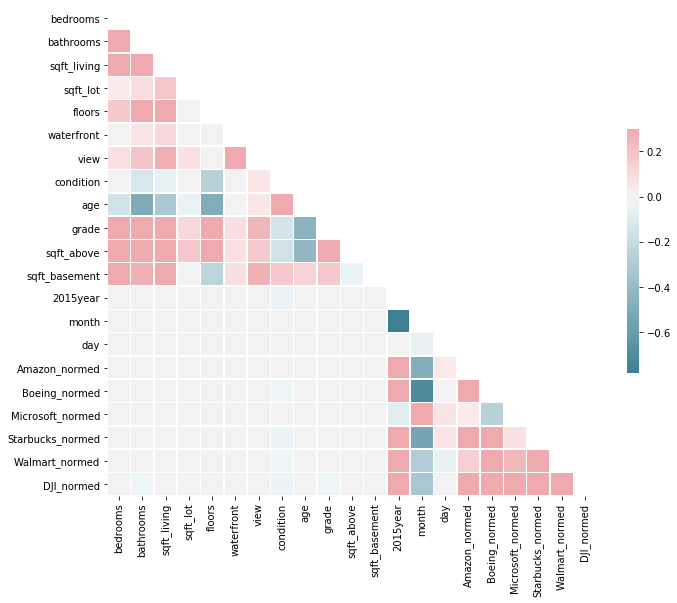

In [21]:
## Let's do something about the multilollinearity

corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

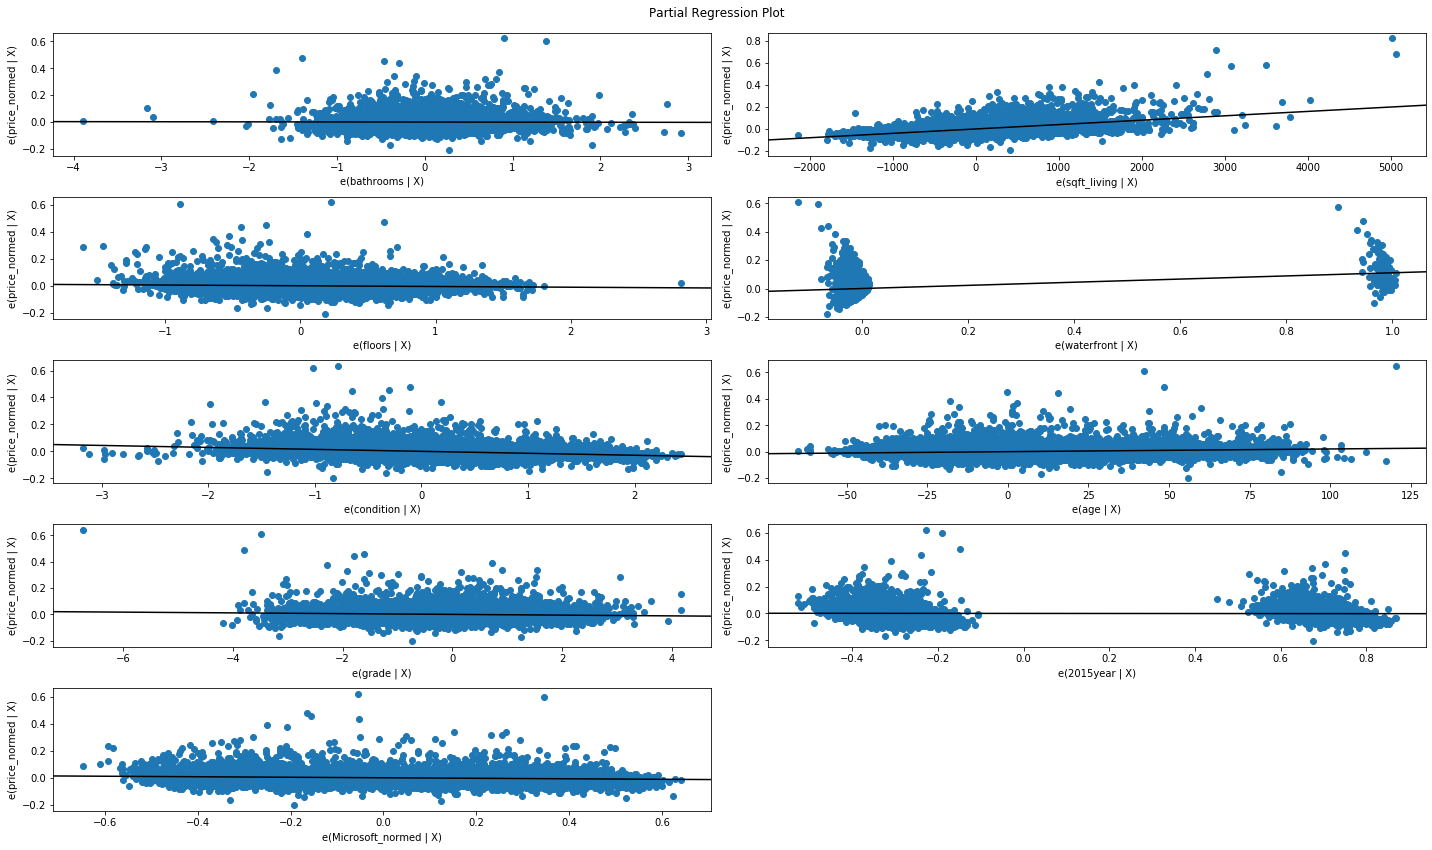

In [62]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(res, fig=fig)

## Now I'll try a simple RNN model

### This uses all the data to get a model, for part 3 I will do training and testing and evaluation

### This gives an idea of how the errors decrease

In [50]:
# sigmoid function

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

y = np.array([y_train['price_normed']]).T
np.random.seed(15200)

# initialize weights randomly with mean 0

##n = hidden layers

n = 1
syn0 = 2*np.random.random((22,n)) - 1
syn1 = 2*np.random.random((n,1)) - 1

for iter in range(1000+1):
 
    # forward propagation
    l_zero = X_train
    l_one = nonlin(np.dot(l_zero,syn0))
    l_two = nonlin(np.dot(l_one, syn1))
    ##print(l_two)
    # how much did we miss?
    l_two_error = y - l_two
    
 
    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1
    l_two_delta = l_two_error * nonlin(l_two,True)
    l_one_error = l_two_delta.dot(syn1.T)
    ##print('derivative is ', nonlin(l1,True))
    # update weights
    l_one_delta = l_one_error * nonlin(l_one,deriv=True)
    if (iter% 100) == 0:
            print("Error after "+str(iter)+" iterations:" + str(np.mean(np.abs(l_two_error))))
    syn0 =syn0 + np.dot(l_zero.T,l_one_delta)
    syn1 =syn1 + np.dot(l_one.T,l_two_delta)
    

Error after 0 iterations:0.45499392289506563
Error after 100 iterations:0.03264560364821605
Error after 200 iterations:0.03264560364821605
Error after 300 iterations:0.03264560364821605
Error after 400 iterations:0.03264560364821605
Error after 500 iterations:0.03264560364821605
Error after 600 iterations:0.03264560364821605
Error after 700 iterations:0.03264560364821605
Error after 800 iterations:0.03264560364821605
Error after 900 iterations:0.03264560364821605
Error after 1000 iterations:0.03264560364821605


## Try an RNN with a few more parameters to tweak

In [51]:
n_lay = [4, 10, 22, 44]
alphaz = [0.001, 0.01, .1, 1.0, 10]
n_epochs = 1000
width = 22

print("\nThe number of epochs is ", n_epochs)

for layers in n_lay:
    print("\nThe number of layers is", layers)
    for alpha in alphaz:
        np.random.seed(11)
        ## now let's print out what alpha we are running
        print("\nTraining With Alpha:", str(alpha))
        ## initialize the weights of the layers
        init_synapse = 2*np.random.random((width,layers)) - 1
        next_synapse = 2*np.random.random((layers,1)) - 1
    
        for i in range(n_epochs + 1):
            lyr_zed = X_train
            lyr_one = nonlin(np.dot(lyr_zed,init_synapse))
            lyr_two = nonlin(np.dot(lyr_one,next_synapse))
                ## how far off?
            lyr_two_error = y - lyr_two
            lyr_two_delta = lyr_two_error * nonlin(lyr_two,True)
            lyr_one_error = lyr_two_delta.dot(next_synapse.T)
            lyr_one_delta = lyr_one_error * nonlin(lyr_one,True)
            if (i% 200) == 0:
                print("Error after "+str(i)+" iterations:" + str(np.mean(np.abs(lyr_two_error))))
            next_synapse = next_synapse + (alpha * (lyr_one.T.dot(lyr_two_delta)))
            init_synapse = init_synapse + (alpha * (lyr_zed.T.dot(lyr_one_delta)))


The number of epochs is  1000

The number of layers is 4

Training With Alpha: 0.001
Error after 0 iterations:0.8289792942088466
Error after 200 iterations:0.03567462279030504
Error after 400 iterations:0.03465231184766382
Error after 600 iterations:0.03422790760246697
Error after 800 iterations:0.03398626890199042
Error after 1000 iterations:0.03382585521428499

Training With Alpha: 0.01
Error after 0 iterations:0.8289792942088466
Error after 200 iterations:0.032645603648216066
Error after 400 iterations:0.032645603648216066
Error after 600 iterations:0.032645603648216066
Error after 800 iterations:0.032645603648216066
Error after 1000 iterations:0.032645603648216066

Training With Alpha: 0.1
Error after 0 iterations:0.8289792942088466
Error after 200 iterations:0.03264560364821605
Error after 400 iterations:0.03264560364821605
Error after 600 iterations:0.03264560364821605
Error after 800 iterations:0.03264560364821605
Error after 1000 iterations:0.03264560364821605

Training With A

### Model Performance Evaluation

## Most of the model performance, first pass, is above with the code

### I'm really curious to see if I can improve the error in the RNN to less that 0.032 with better choices of learning-rate, width, number of layers, and feature selection. For example, I'm not sure Walmart's stock creates a lot of disposable cash for locals to bid up housing prices.

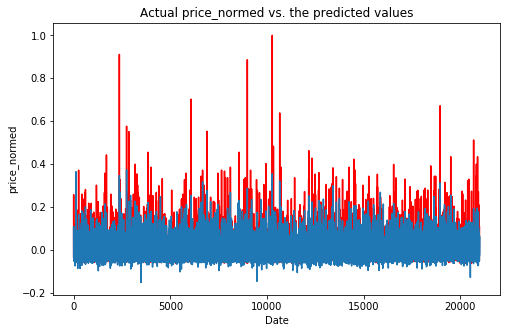

In [11]:
## The linear regression model

def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + ' vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(Keepers, 'price_normed')  

## Improved Machine Learning Model(s)

## I will use the same models: multiple regression, simple NN, and RNN - putting more effort into feature selection to try to improve performance in the final part.



## Since I forgot to normalize the stock prices in the first part of the milestone, I will upload the normalized file so that I can start with that in the last part of the milestone



 The tail of Keepers looks like

          datetime  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20986  2015-05-14         4       1.75         1980      5850     1.0   
20987  2015-05-14         5       3.00         3223      6371     2.0   
20988  2015-05-14         4       3.50         2630      3757     2.0   
20989  2015-05-15         5       2.00         1870      7344     1.5   
20990  2015-05-27         4       2.25         3750      5000     2.0   

       waterfront  view  condition  grade    ...     day  price_normed  \
20986           0     1          4      8    ...      14      0.025855   
20987           0     0          3      9    ...      14     -0.008453   
20988           0     0          3     10    ...      14      0.029340   
20989           0     0          3      7    ...      15     -0.012552   
20990           0     0          5      8    ...      27      0.107558   

       Amazon_normed  Boeing_normed  Microsoft_normed  Starbucks_normed  \
20986 